In [3]:
# Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(
    r"D:\Data Science Project (ClimateScope)\Milestones\ClimateScope\Milestone_2\data\raw\cleaned_weather_data.csv"
)

df.head()


,date,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,2024-05-16 08:45:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,"January 01, 1970 12:00 AM",26.6,79.8,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,2024-05-16 08:45:00,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,"January 01, 1970 12:00 AM",19.0,66.2,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,2024-05-16 08:45:00,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,"January 01, 1970 12:00 AM",23.0,73.4,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,2024-05-16 08:45:00,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,"January 01, 1970 12:00 AM",6.3,43.3,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,2024-05-16 08:45:00,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,"January 01, 1970 12:00 AM",26.0,78.8,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
# Convert 'last_updated' to datetime and extract day & perform descriptive statistics
df['last_updated'] = pd.to_datetime(
    df['last_updated'], 
    format="%m/%d/%Y %I:%M:%S %p",
    errors='coerce'
)

df['day'] = df['last_updated'].dt.day


df.describe(include='number')

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,day
count,106208.000000,106208.000000,1.062080e+05,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,...,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,106208.000000,0.0
mean,19.165948,22.054489,1.739489e+09,22.598653,72.679340,8.163142,13.140713,170.770620,1014.028482,29.943593,...,501.479638,61.462405,15.624002,10.992864,25.386785,51.556972,1.734681,2.695475,50.318695,NaN
std,24.445544,65.805496,1.364131e+07,8.856557,15.941617,7.679985,12.357120,102.696649,11.067948,0.326791,...,821.892620,31.827372,25.447359,39.310907,39.616287,158.880852,0.967319,2.521466,35.028306,NaN
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000,NaN
25%,3.750000,-6.836100,1.727689e+09,17.700000,63.800000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,227.000000,41.000000,1.480000,0.925000,7.250000,10.510000,1.000000,1.000000,15.000000,NaN
50%,17.250000,23.316700,1.739527e+09,24.500000,76.100000,6.900000,11.200000,164.000000,1013.000000,29.930000,...,318.200000,58.000000,5.150000,2.405000,14.650000,21.275000,1.000000,2.000000,51.000000,NaN
75%,40.400000,50.580000,1.751274e+09,28.300000,82.900000,11.200000,18.000000,256.000000,1018.000000,30.060000,...,494.000000,78.000000,17.945000,8.880000,28.860000,44.030000,2.000000,3.000000,85.000000,NaN
max,64.150000,179.220000,1.763019e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000,NaN


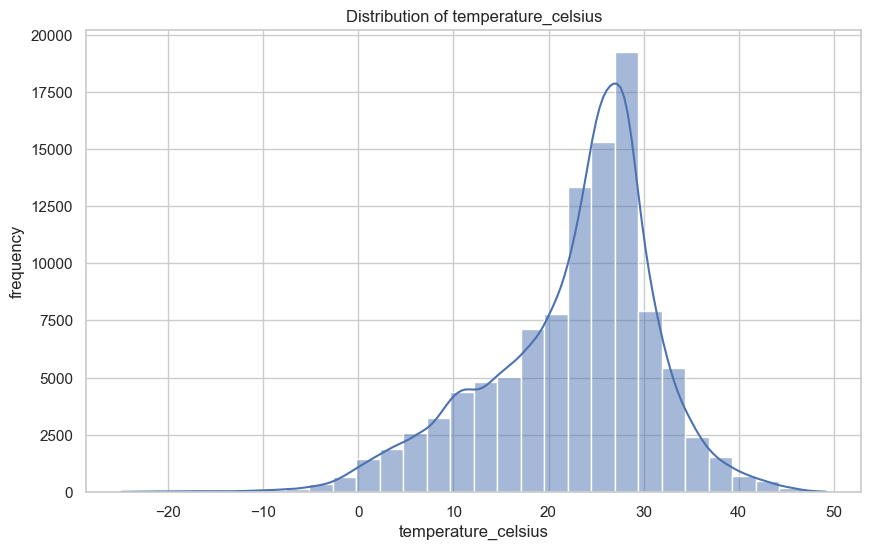

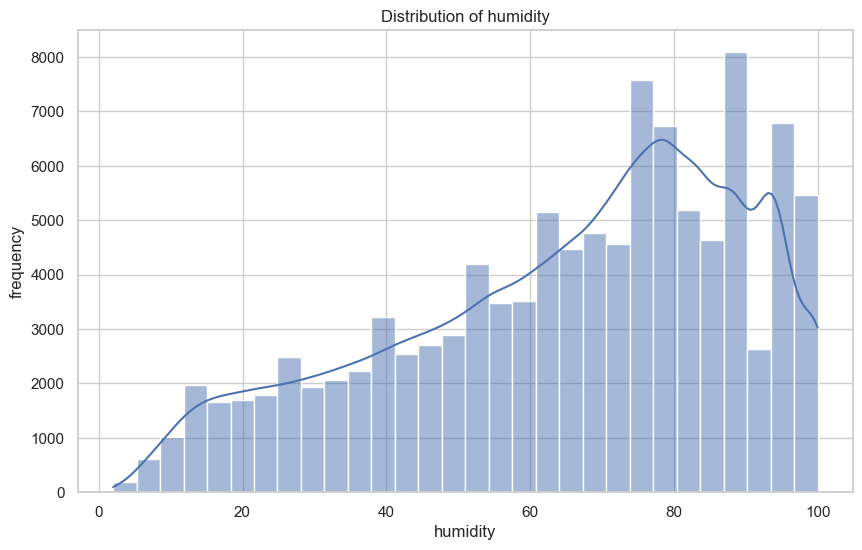

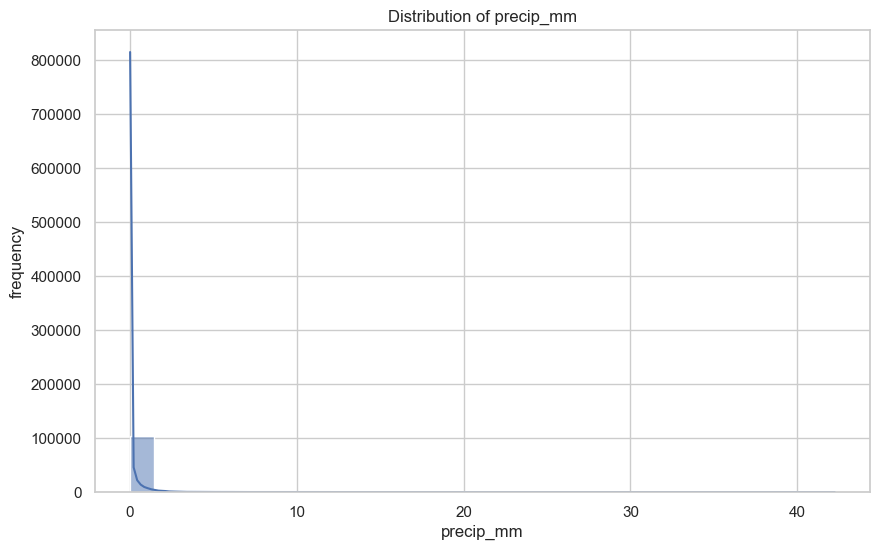

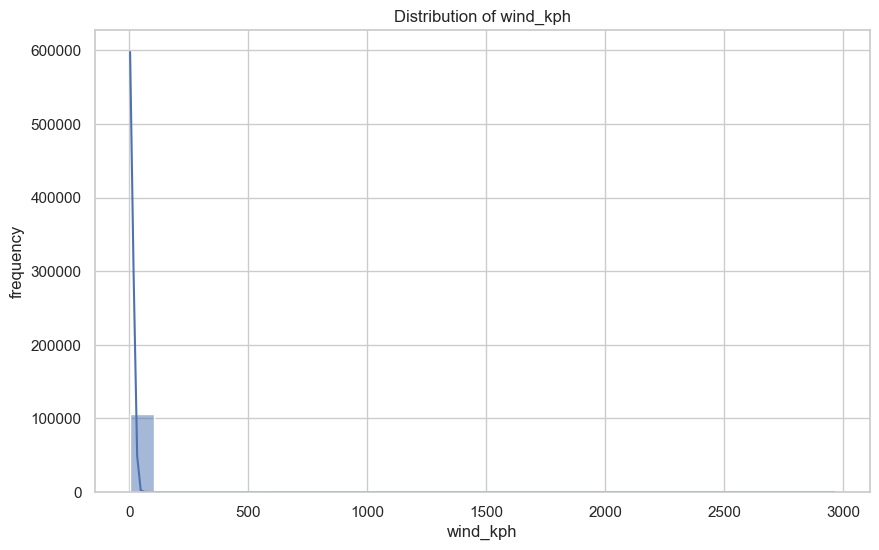

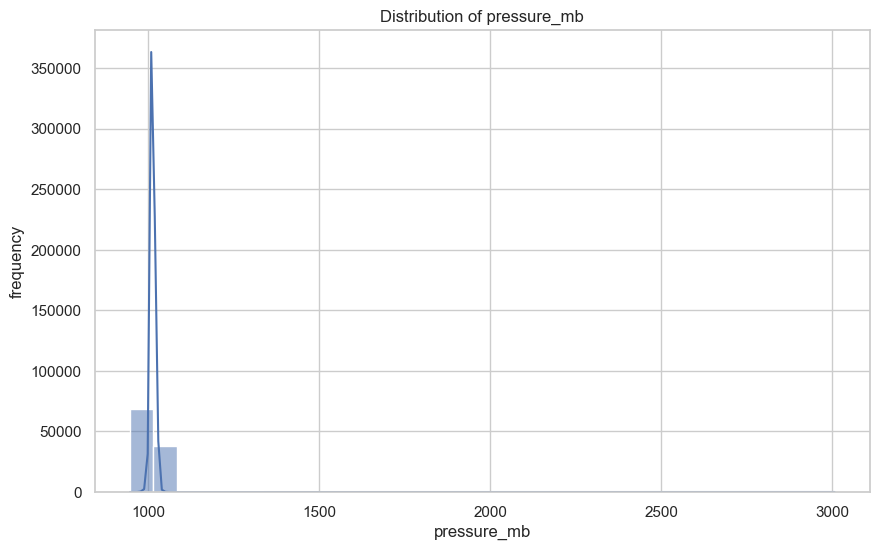

In [5]:
# perform distribution plots for numerical features
numeric_cols =["temperature_celsius", "humidity", "precip_mm", "wind_kph", "pressure_mb"]
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col].dropna(),bins=30,kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()




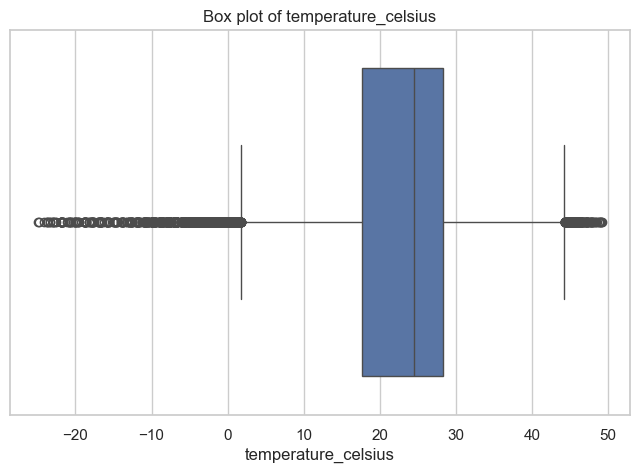

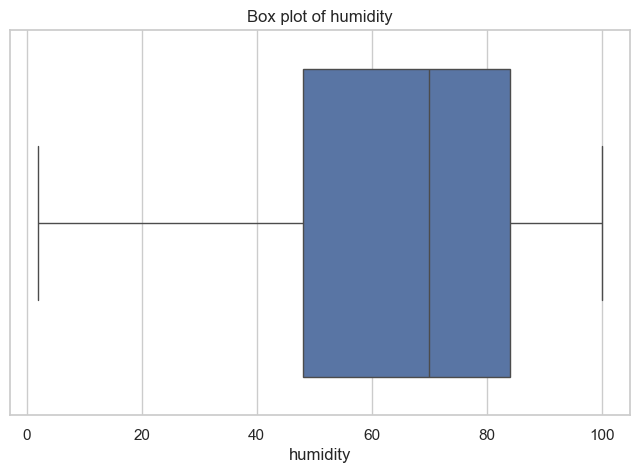

In [6]:
# Detect Outliers using Box Plots
numeric_cols = ["temperature_celsius", "humidity"]
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()


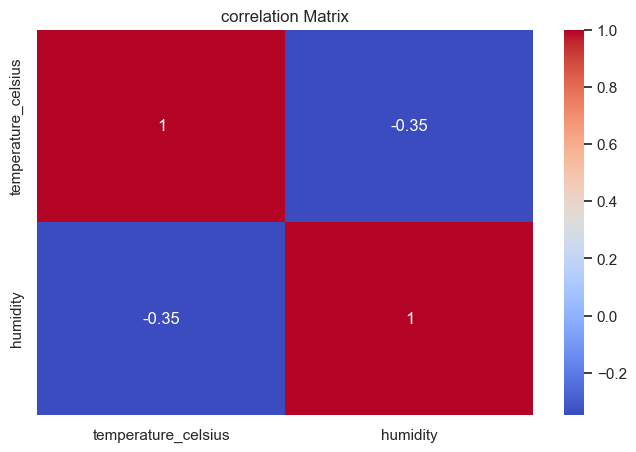

In [7]:
# Find correlations between numerical features
correlation = df[["temperature_celsius", "humidity"]].corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True,cmap="coolwarm")
plt.title('correlation Matrix')
plt.show()

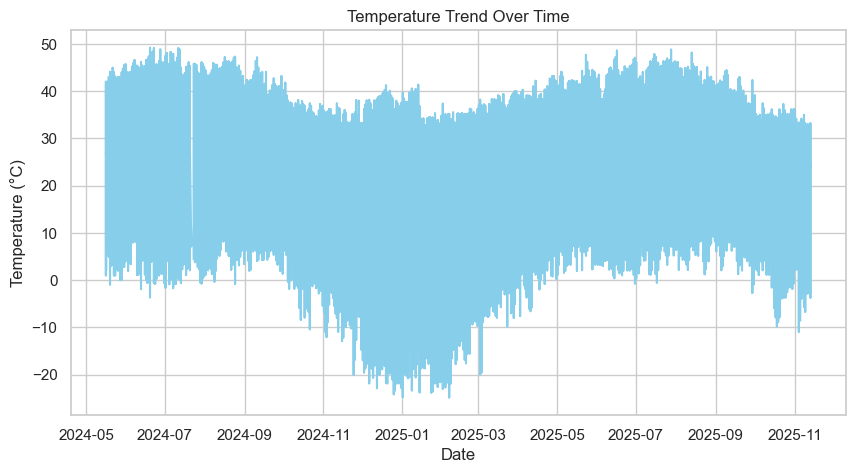

In [8]:
# Time Series Plot for Temperature over Time
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df = df.sort_values("date")

    # handle possible misspelling and ensure numeric dtype
    temp_col = "temperature_celsius" if "temperature_celsius" in df.columns else "temperature_celcius"
    df[temp_col] = pd.to_numeric(df[temp_col], errors="coerce")

    plt.figure(figsize=(10,5))
    plt.plot(df["date"], df[temp_col], color="skyblue")
    plt.title("Temperature Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.show()


In [9]:
#Task 2 Identify Extreme Weather Evnets
THRESHOLDS = {
    "heatwave_temp": 40,      
    "cold_temp": 5,          
    "heavy_rain": 50,       
    "high_wind": 70,         
    "low_pressure": 980,   
    "high_humidity": 90       
}

extreme_events = pd.DataFrame()

# Heatwave
extreme_events["heatwave"] = df["temperature_celsius"] > THRESHOLDS["heatwave_temp"]

# Cold wave
extreme_events["cold_wave"] = df["temperature_celsius"] < THRESHOLDS["cold_temp"]

# Heavy rain
extreme_events["heavy_rain"] = df["precip_mm"] > THRESHOLDS["heavy_rain"]

# High wind
extreme_events["high_wind"] = df["wind_kph"] > THRESHOLDS["high_wind"]

# Low pressure (storm indicator)
extreme_events["low_pressure"] = df["pressure_mb"] < THRESHOLDS["low_pressure"]

# High humidity
extreme_events["high_humidity"] = df["humidity"] > THRESHOLDS["high_humidity"]

df_extreme_events = pd.concat([df, extreme_events], axis=1)

# select rows where any extreme event is True
extreme_only = df_extreme_events[
    df_extreme_events[["heatwave", "cold_wave", "heavy_rain", "high_wind", "low_pressure", "high_humidity"]]
    .any(axis=1)
]

print("===== Extreme Weather Events Detected =====")
print(extreme_only)
extreme_only.to_csv("extreme_weather_events_output.csv", index=False)

===== Extreme Weather Events Detected =====
                      date       country     location_name  latitude  \
134    2024-05-16 08:45:00        Panama       Panama City    8.9700   
122    2024-05-16 08:45:00   Netherlands         Amsterdam   52.3700   
176    2024-05-16 08:45:00         Tonga        Nuku`Aloia  -21.1300   
181    2024-05-16 08:45:00        Tuvalu          Funafuti   -8.5200   
150    2024-05-16 08:45:00       Belgium  'S Gravenstaffel   50.8800   
...                    ...           ...               ...       ...   
106068 2025-11-13 07:30:00       Estonia           Tallinn   59.4339   
106071 2025-11-13 07:30:00  Fiji Islands              Suva  -18.1333   
106072 2025-11-13 07:30:00       Finland          Helsinki   60.1756   
106082 2025-11-13 07:30:00        Guinea           Conakry    9.5092   
106084 2025-11-13 07:30:00        Guyana        Georgetown    6.8000   

        longitude           timezone  last_updated_epoch last_updated  \
134      -79.5300 

             temperature_celsius   humidity  precip_mm   wind_kph  pressure_mb
country                                                                       
Afghanistan            21.609524  23.558608   0.034872   9.446520  1009.238095
Albania                22.469597  51.320513   0.122344   9.184432  1015.798535
Algeria                23.106789  59.550459   0.033486  12.783670  1017.317431
Andorra                12.122527  59.161172   0.122070   8.342674  1018.029304
Angola                 26.152747  73.245421   0.030110   9.540842  1013.144689
...                          ...        ...        ...        ...          ...
Гватемала              15.900000  95.000000   0.000000   6.500000  1020.000000
Польша                 24.200000  56.000000   0.000000  13.700000  1013.000000
Турция                 34.000000  44.000000   0.000000  24.100000  1006.000000
كولومبيا               23.100000  95.000000   0.050000   6.500000  1017.000000
火鸡                     29.700000  24.000000   0.0000

C:\Users\Admin\AppData\Local\Temp\ipykernel_8700\2595963427.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hottest_contries.index, y=hottest_contries.values, palette="Reds_r")
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


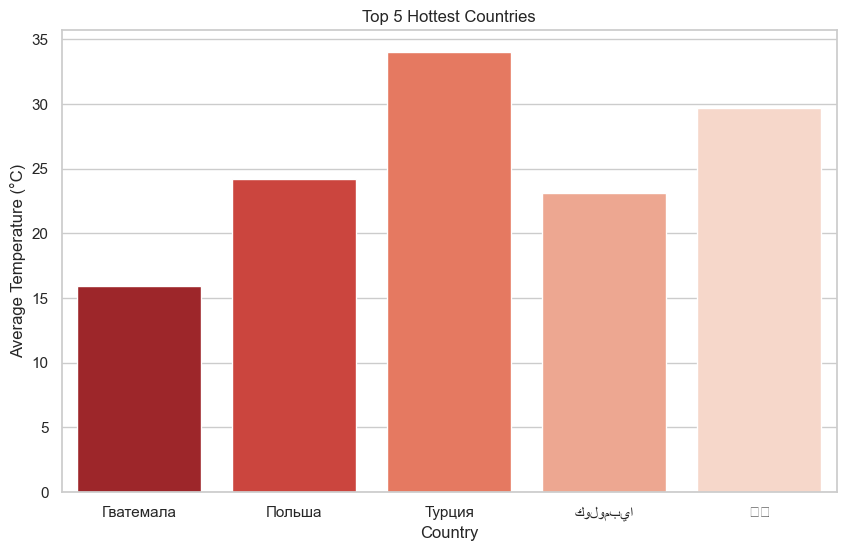

C:\Users\Admin\AppData\Local\Temp\ipykernel_8700\2595963427.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coldest_countries.index, y=coldest_countries.values,


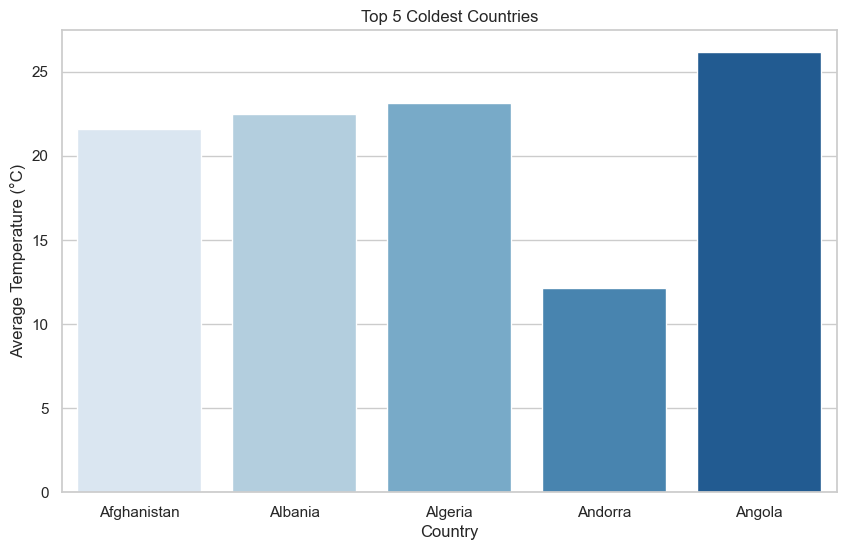

In [10]:
# Task 3 Compare Weather Conditions
# Across Different Locations

country_group = df.groupby('country')[['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph', 'pressure_mb']]
print(country_group.mean())

# Comparing country on hottest and coldest temperatures
hottest_contries =df.groupby('country')['temperature_celsius'].mean().tail(5)
coldest_countries =df.groupby('country')['temperature_celsius'].mean().head(5)
print("Hottest Countries:\n", hottest_contries)
print("Coldest Countries:\n", coldest_countries)  
# Visualize hottest countries
plt.figure(figsize=(10,6))
sns.barplot(x=hottest_contries.index, y=hottest_contries.values, palette="Reds_r")
plt.title("Top 5 Hottest Countries")
plt.xlabel("Country")
plt.ylabel("Average Temperature (°C)")
plt.show()  
# Visualize coldest countries
plt.figure(figsize=(10,6))
sns.barplot(x=coldest_countries.index, y=coldest_countries.values,
            palette="Blues")
plt.title("Top 5 Coldest Countries")
plt.xlabel("Country")
plt.ylabel("Average Temperature (°C)")
plt.show()    



In [11]:
# Identify the rainiest countries
rainiest = df.groupby("country")["precip_mm"].sum().sort_values(ascending=False).head(10)

print("===== Rainiest Countries (Total Rainfall) =====")
print(rainiest)


===== Rainiest Countries (Total Rainfall) =====
country
Indonesia            502.77
Sierra Leone         319.37
Malaysia             312.54
Nepal                308.57
Vietnam              306.37
Thailand             299.15
Myanmar              287.73
Brunei Darussalam    283.61
Sri Lanka            266.59
Guinea               266.16
Name: precip_mm, dtype: float64
